# Project 1 - Questions

In [1]:
from matplotlib.pyplot import imread, imshow
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img = imread("questions/RISDance.jpg")

**Q1**: Explicitly describe image convolution: the input, the transformation, and the output. Why is it useful for computer vision?

**A1**:The convolution operation takes a filter F of size p x q and an image I of size m x n. It then uses the filter F to, for each pixel in image I, compute a weighted sum of the surrounding pixels. Convolutions of image data take the form: $y(r,c) = \sum_{i,j} I(i,j) F(r-i,c-j) $

Convolutions allows us to enhance images (e.g. denoising, increase contrast, resizing, etc.), extract information from images (e.g. texture, edges, distinctive points, etc.) or detect patterns (e.g. template matching).

**Q2**: What is the difference between convolution and correlation? Construct a scenario which produces a different output between both operations.

**A2**: The difference between the correlation operation and the convolution operation is that in the case of the latter the filter is flipped on the horizontal axis. In other words the filter is rotated by 180 degrees. If the filter matrix is symmetric across the horizontal axis there is no difference between the correlation and covolution operation. However, if this is not the case, there will be a difference in the produced output.

In [3]:
k = 1/9 * np.array([[10,10,10],[1,1,1],[5,5,5]])
convimg = np.zeros_like(img)
corrimg = np.empty_like(img)

for channel_i in range(3):
    convimg[:,:,channel_i] = ndimage.convolve(input=img[:,:,channel_i], weights=k)
    corrimg[:,:,channel_i] = ndimage.correlate(input=img[:,:,channel_i], weights=k)
np.sum(corrimg-convimg)

2746080022

**Q3**: What is the difference between a high pass filter and a low pass filter in how they are constructed, and what they do to the image? Please provide example kernels and output images.

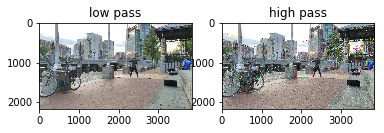

In [4]:
k_low = 1/9 * np.array([[1,1,1],[1,1,1],[1,1,1]])
k_high = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
lpass = np.zeros_like(img)
hpass = np.zeros_like(img)
for channel_i in range(3):
    lpass[:,:,channel_i] = ndimage.convolve(input=img[:,:,channel_i], weights=k_low)
    hpass[:,:,channel_i] = ndimage.convolve(input=img[:,:,channel_i], weights=k_high)

plt.subplot(1,2,1)
imshow(lpass)
plt.title("low pass")
plt.subplot(1,2,2)
plt.title("high pass")
imshow(lpass-hpass)

**Q4**:How does computation time vary with filter sizes from 3×3to15×15(for all odd and square sizes), and with image sizes from 0.25 MPix to 8 MPix (choose your own intervals)? Measure both using scipy.ndimage.convolve or scipy.ndimage.correlate to produce a matrix of values. Use the skimage.transform module to vary the size of an image. Use an appropriate charting function to plot your matrix of results, such as Axes3D.scatter or Axes3D.plotsurface.Do the results match your expectation given the number of multiply and add operations in convolution? Image:RISDance.jpg (in the .tex directory).

**A4**: The computation time increases in a non-linear fashion. E.g. doubling the kernel size increases the computation time 5-fold.

In [5]:
from scipy.ndimage import convolve
from matplotlib.pyplot import imread, imshow
import skimage
import numpy as np
from skimage.transform import rescale
import warnings
import time
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')

In [6]:
img = imread("questions/RISDance.jpg")

In [7]:
kernel_sizes = list(range(3,12))
scale_factors = np.arange(1, 0, -0.2)
measurements = np.empty((len(scale_factors),len(kernel_sizes)))
for i, scale_i in enumerate(scale_factors):
    img_scaled = rescale(img, scale_i)
    for j, k_i in enumerate(kernel_sizes):
        kernel = np.ones((k_i, k_i, 3)) / k_i**2 / 3       
        start = time.time()
        img_convolved = convolve(img_scaled, kernel)
        end = time.time()
        measurements[i,j] = end-start

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


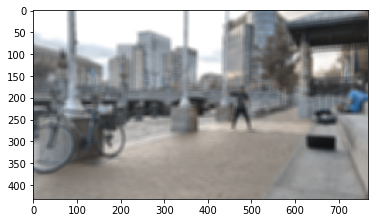

In [8]:
imshow(img_convolved)

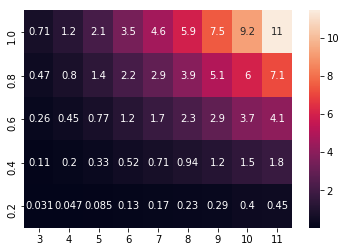

In [9]:
df = pd.DataFrame(measurements)
df.columns = kernel_sizes
df = df.set_index(np.round(scale_factors,2))
sns.heatmap(df, annot=True)

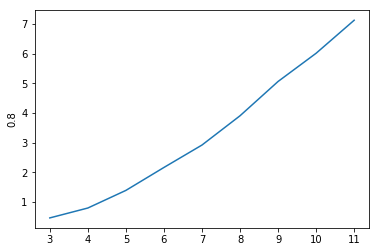

In [10]:
sns.lineplot(kernel_sizes, df.iloc[1,:])